CREATE DATABASE BlinkIT

## Questions to find from 3 different tables

### 1. Find Top 5 revenue generating products

```
SELECT productname, SUM(quantity * priceperunit) as total_generated_revenue
FROM orderdetails
GROUP BY productname
ORDER BY total_generated_revenue DESC
LIMIT 5;
```
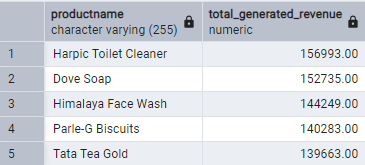

### 2. Which city has placed the highest number of orders?

```
SELECT C.city, COUNT(orderid) AS number_of_orders
FROM customers C JOIN orders O ON C.customerid = O.customerid
GROUP BY C.city
ORDER BY number_of_orders DESC;
```
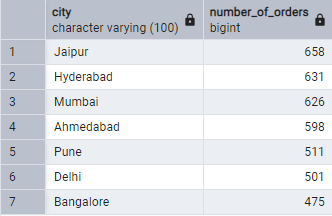

### 3. What is the total number of delivered and canceled orders?

```
select O.deliverystatus, count(OD.orderid) as order_count
from orders O join orderdetails OD on O.orderid = OD.orderid
group by O.deliverystatus;
```
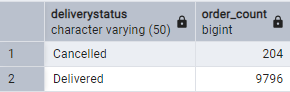

### 4. Calculate the percentage of orders that were Delivered.

```
SELECT 
    ROUND(
        (SUM((DeliveryStatus = 'Delivered')::INT)::DECIMAL / COUNT(*) * 100),
        2
    ) AS DeliveredPercentage
FROM orders;
```
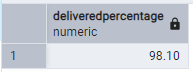


### 5.what is the total revenue generated?

```
SELECT 
    SUM(TotalAmount) AS Total_Revenue
FROM
    orders;
```
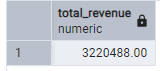

### 6.Find the Top 5 city with the highest total revenue

```
SELECT C.city, SUM(o.totalamount) AS highest_total_revenue
FROM customers C JOIN orders O ON C.customerid = O.customerid
GROUP BY C.city
ORDER BY highest_total_revenue DESC
LIMIT 5;
```
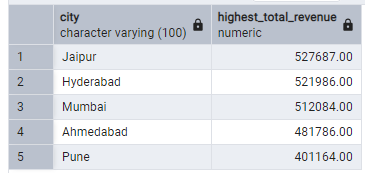


### 7.Identify customers who haven't placed any orders.

```
select c.name, c.customerid
from customer c left join orders o on c.customerid = o.customerid left join orderdetails od on o.orderid = od.orderid
where od.orderid s null;
```
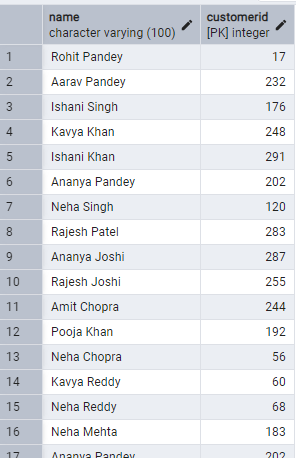   ...

### 8.List all customers with their rank based on total spending

```
select c.customerid, c.name, SUM(o.totalamount) as total_spending
from customers c join orders o on c.customerid = o.customerid
group by 1,2
order by total_spending DESC;
```
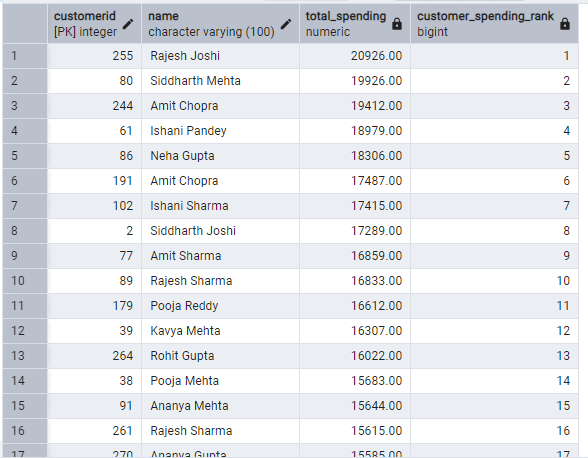   ...

### 9.List all customers with their rank based on total purchase 

```
select c.customerid, c.name, SUM(od.quantity * od.priceperunit) as total_purchase
from customers c join orders o on c.customerid = o.customerid join orderdetails od on o.orderid = od.orderid
group by 1,2
order by total_purchase DESC;
```
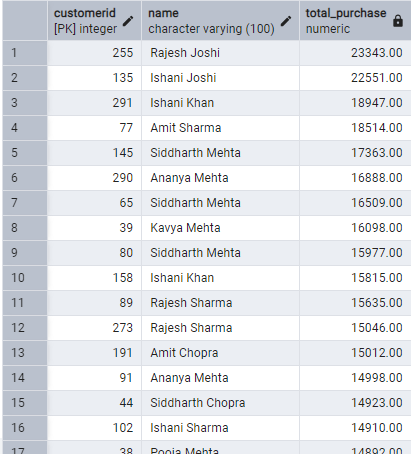   ...

### 10.Find customers who placed multiple orders on the same day.

```
SELECT 
    c.Name,
    DATE(o.OrderDateTime) AS order_date,
    COUNT(*) AS total_orders
FROM orders o
JOIN customers c USING (CustomerID)
GROUP BY c.Name, DATE(o.OrderDateTime)
HAVING COUNT(*) > 1;
```
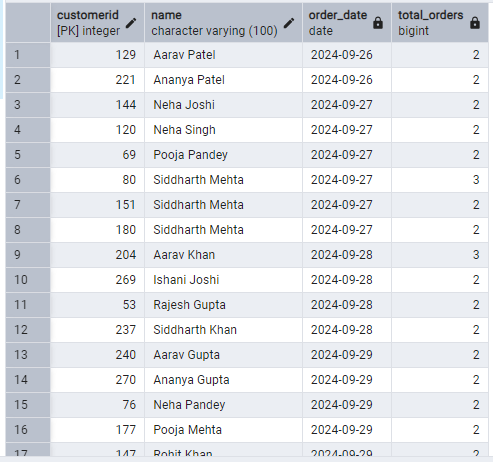   ...

### 11.List the top 5 customers based on their totalPurchase 

```
select c.customerid, c.name, SUM(od.quantity * od.priceperunit) as total_purchase
from customers c join orders o on c.customerid = o.customerid join orderdetails od on o.orderid = od.orderid
group by 1,2
order by total_purchase DESC
LIMIT 5;
``` 
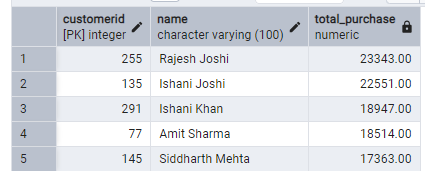

### 12. Find the average number of products per order, grouped by customer city.

```
SELECT 
    c.city,
    ROUND(AVG(p.total_products), 2) AS avg_products_per_order
FROM customers c
JOIN orders o ON c.customerid = o.customerid
JOIN (
    SELECT orderid, SUM(quantity) AS total_products
    FROM orderdetails
    GROUP BY orderid
) p ON o.orderid = p.orderid
GROUP BY c.city
ORDER BY avg_products_per_order DESC;

```
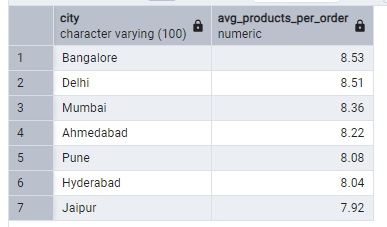
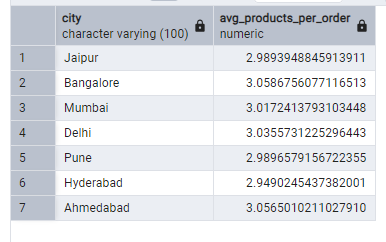

### 13.Calculate the percentage of total revenue contributed by each product category.

```
SELECT 
    productname,
    ROUND(SUM(quantity * priceperunit) * 100.0 /
          (SELECT SUM(quantity * priceperunit) FROM orderdetails), 2)
    AS revenue_percent
FROM orderdetails
GROUP BY productname
ORDER BY revenue_percent DESC;
```
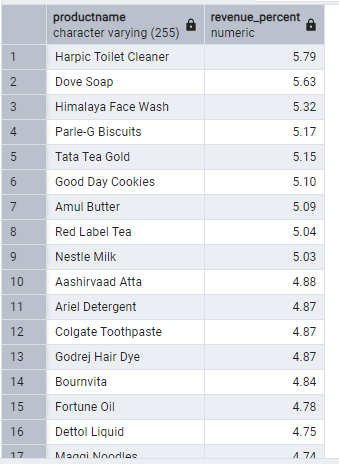   ...